In [ ]:
%pip install music21

In [1]:
import os
from music21 import converter, pitch, interval, instrument, note, stream, meter
from matplotlib import pyplot as plt

from xen.data import SequenceDataSet
from xen.visualise import plotPart, plotMeasures, plotSequence

data_dir = "../../../ml_data/music/mutopia_guitar/"
# data_file = "CarcassiMethodPreludes.mid"
data_file = "Matiegka3.mid"

dataset = SequenceDataSet()
dataset.loadMidiFiles([data_dir + data_file])

print(f'Loaded {len(dataset.songs)} Songs') 

Loaded 1 Songs


In [ ]:
for i, song in enumerate(dataset.songs):
    for part in song.score.getElementsByClass(stream.Part):
        # part = part.chordify()
        print(f'Length: {part.duration.quarterLength}')
        plotPart(part)

# scores[0].show()

In [ ]:
for i, song in enumerate(dataset.songs):
    for part in song.score.getElementsByClass(stream.Part):
        measures = part.getElementsByClass(stream.Measure)
        
        plotMeasures(measures[0:4])
        

Ignored 6 sequences from ../../../ml_data/music/mutopia_guitar/Matiegka3.mid
(40, 64, 128)


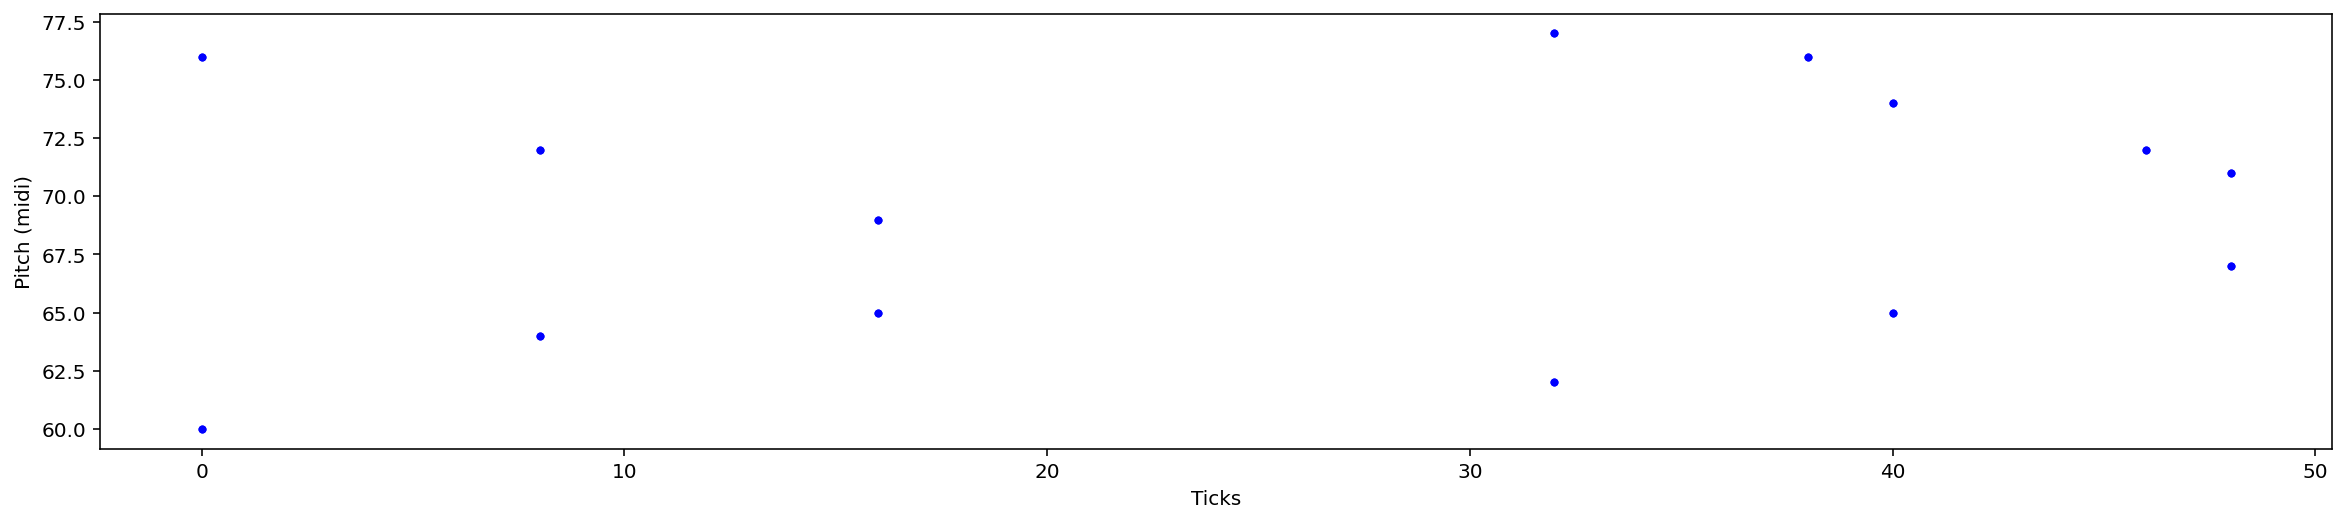

In [2]:
measuresPerSequence = 4
ticksPerQuarter = 4 # 4 = 16th notes, 12 = 16th notes + triplets

sequences, _, _ = dataset.makeSequences(ticksPerQuarter, measuresPerSequence, '4/4')
print(sequences.shape)

plotSequence(sequences[0])

(32, 24)


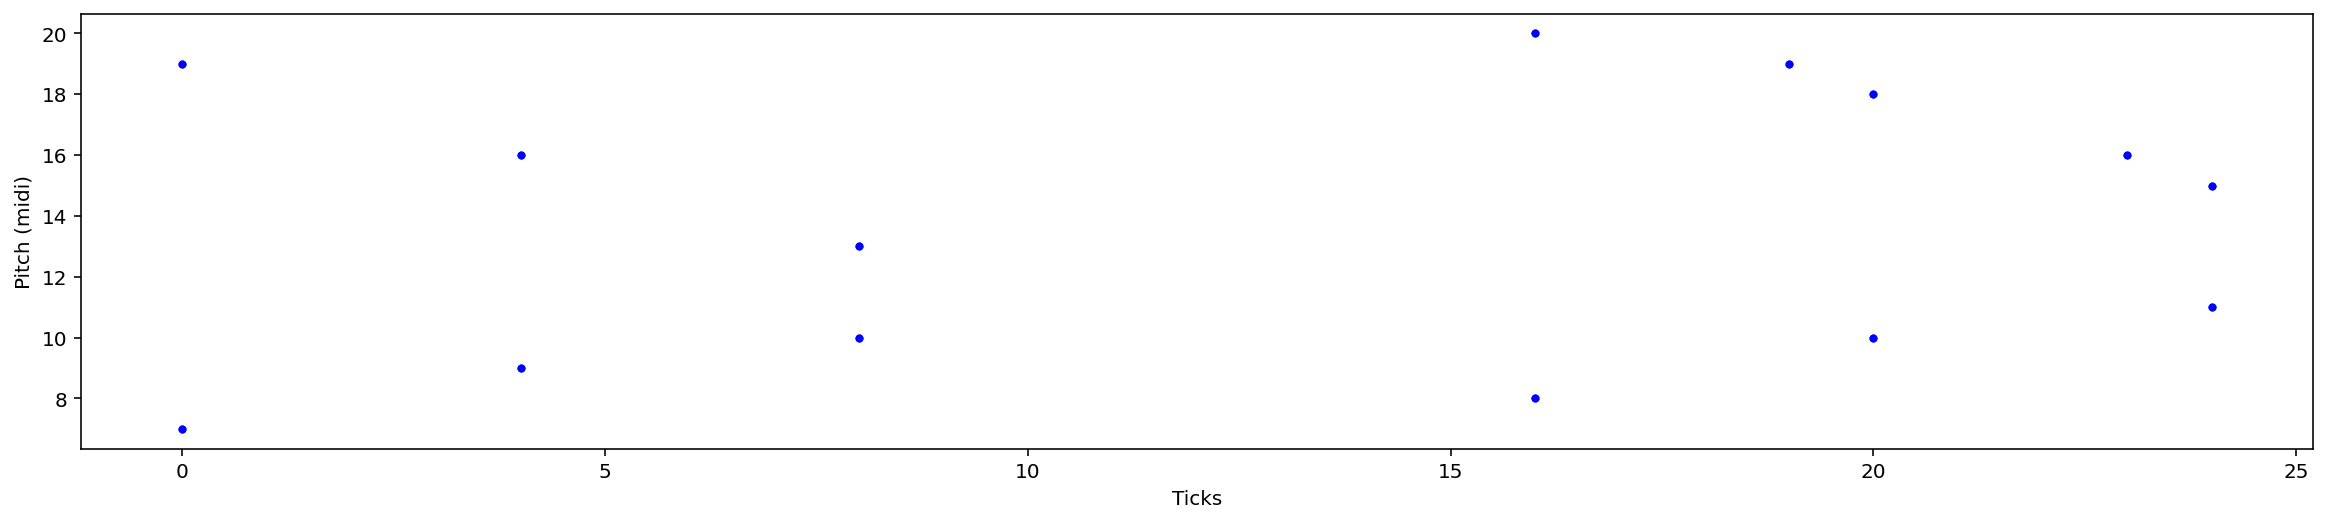

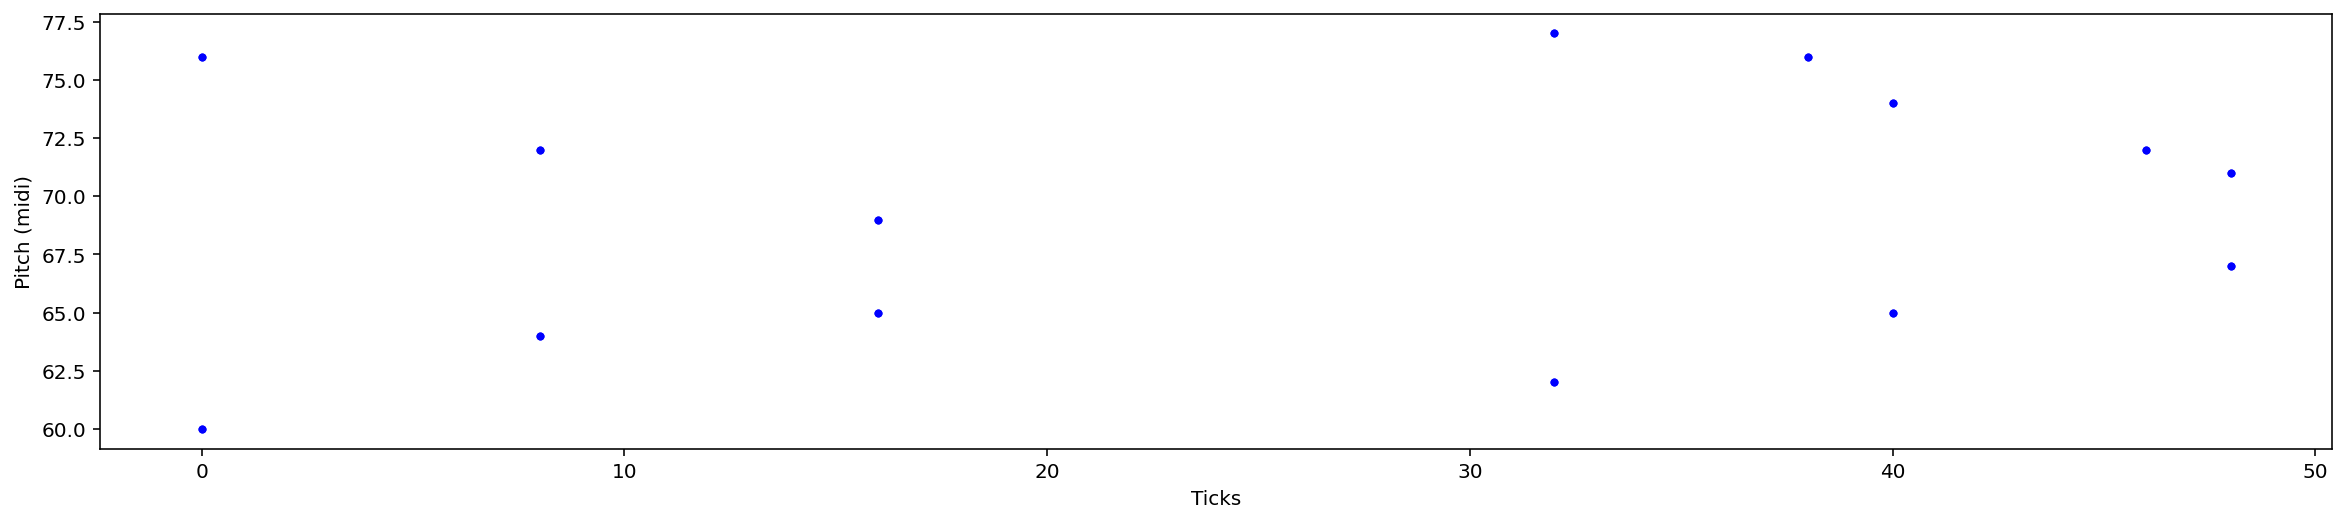

In [3]:
compressor = dataset.makeCompressor()

compressed = compressor.compress(sequences[0])

print(compressed.shape)
plotSequence(compressed)

decompressed = compressor.decompress(compressed);
plotSequence(decompressed)